PROJECT 1

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv("Global_Superstore(CSV).csv")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


In [3]:
# Handling missing values
data.fillna(method='ffill', inplace=True)
display(data.isnull().sum())

<ipython-input-3-a7698964aaf7>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Postal Code,0
City,0


In [4]:
# Removing duplicates
data.drop_duplicates(inplace=True)
display(data.duplicated().sum())

0

In [8]:
# Handling outliers using IQR
Q1 = data.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = data.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (data.select_dtypes(include=[np.number]) < lower_bound) | (data.select_dtypes(include=[np.number]) > upper_bound)
data_no_outliers = data[~outliers.any(axis=1)]

In [11]:
# Statistical Analysis
summary_stats = data.describe()
summary_stats.loc['median'] = data.median(numeric_only=True)
summary_stats.loc['variance'] = data.var(numeric_only=True)
display(summary_stats)
print("Data types in the DataFrame:")
print(data.dtypes)
correlation_matrix = data.corr(numeric_only=True)
display(correlation_matrix)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.507933e+04,5.330166e+04,1.710971e+03,5.558000,0.092840,288.920440,272.384897
std,1.289773e+04,3.280610e+04,1.259239e+03,2.718460,0.148666,574.504782,176.160716
min,5.800000e+01,2.920000e+03,1.910000e+00,1.000000,0.000000,-3059.820000,1.070000
25%,1.511875e+04,1.913400e+04,8.269075e+02,4.000000,0.000000,10.037500,209.827500
50%,2.508450e+04,6.050500e+04,1.585115e+03,5.000000,0.000000,190.685000,258.897500
75%,3.452400e+04,8.502300e+04,2.477812e+03,7.000000,0.150000,518.872500,351.070250
max,5.128400e+04,9.819800e+04,9.892740e+03,14.000000,0.800000,4946.370000,923.630000
median,2.508450e+04,6.050500e+04,1.585115e+03,5.000000,0.000000,190.685000,258.897500
variance,1.663514e+08,1.076240e+09,1.585683e+06,7.390026,0.022102,330055.744491,31032.598017


Data types in the DataFrame:
Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
Postal Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object


,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
Row ID,1.000000,0.031019,-0.220878,-0.173947,0.032788,-0.043650,-0.284645
Postal Code,0.031019,1.000000,-0.040906,-0.028334,0.059983,-0.025691,-0.060615
Sales,-0.220878,-0.040906,1.000000,0.555691,-0.187997,0.533676,0.644891
Quantity,-0.173947,-0.028334,0.555691,1.000000,0.034045,0.154481,0.356324
Discount,0.032788,0.059983,-0.187997,0.034045,1.000000,-0.505190,-0.169216
Profit,-0.043650,-0.025691,0.533676,0.154481,-0.505190,1.000000,0.290593
Shipping Cost,-0.284645,-0.060615,0.644891,0.356324,-0.169216,0.290593,1.000000


<Figure size 500x500 with 0 Axes>

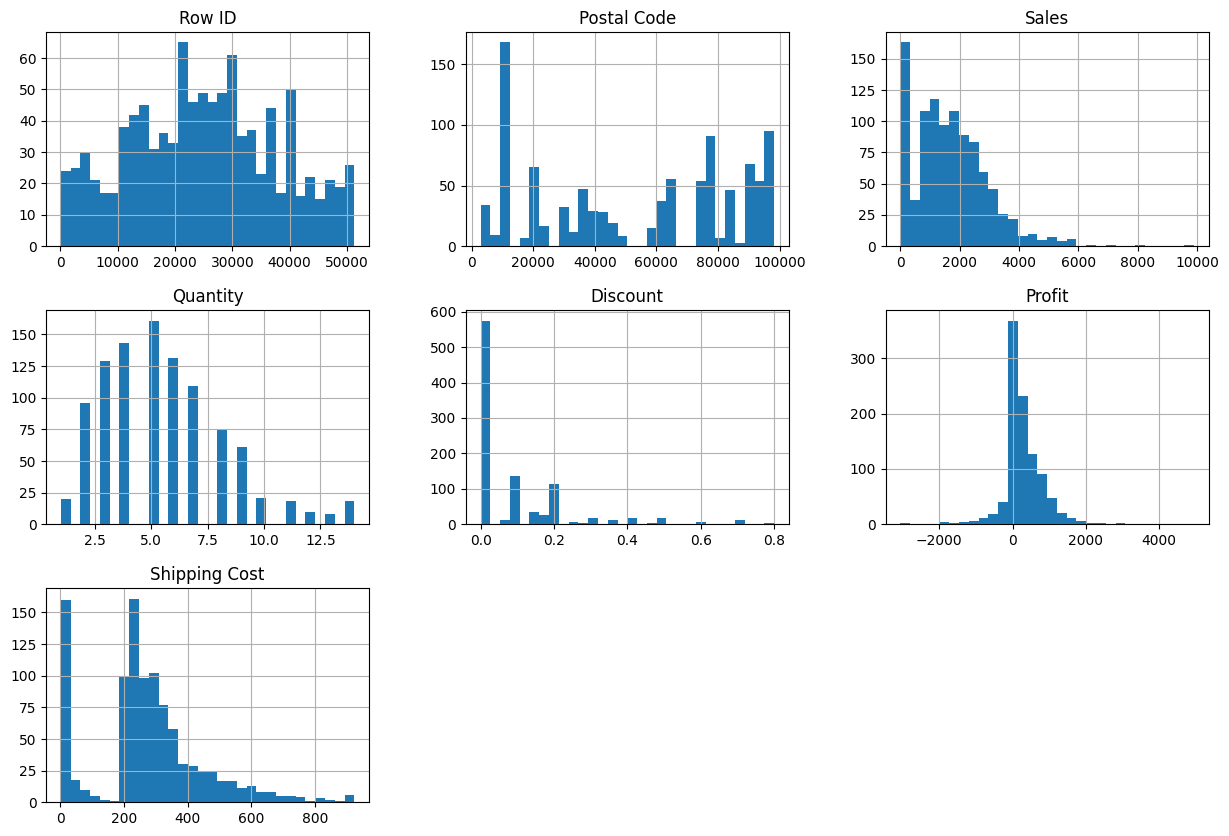

In [22]:
# Histograms
plt.figure(figsize=(5,5))
data.hist(bins=30, figsize=(15,10))
plt.show()

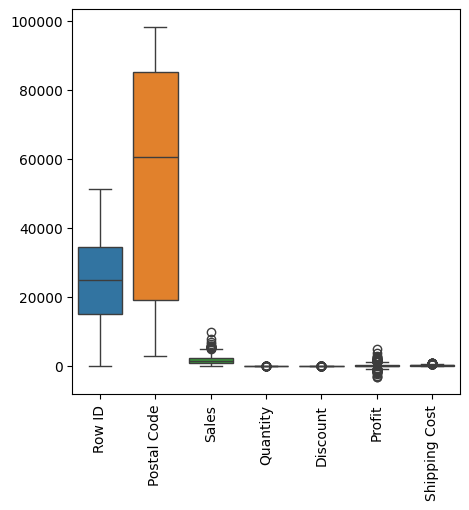

In [23]:
# Boxplots
plt.figure(figsize=(5,5))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

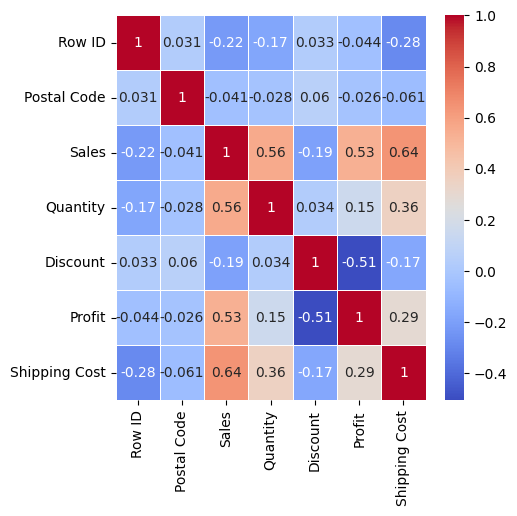

In [24]:
# Heatmap
plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

PROJECT 2

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [33]:
data2=pd.read_csv("Global_Superstore(CSV).csv")
data2.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11/11/2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/2014,2/7/2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/2014,11/6/2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


In [34]:
# Selecting relevant columns
columns_needed = ['Product Name', 'Region', 'Sales', 'Profit', 'Discount', 'Category', 'Order Date']
data2 = data2[columns_needed]

In [35]:
# Convert 'Date' to datetime format
data2['Date'] = pd.to_datetime(data2['Order Date'], errors='coerce')

In [36]:
# Handling missing values
data2.fillna({'Sales': data2['Sales'].median(), 'Profit': data2['Profit'].median(), 'Discount': data2['Discount'].median()}, inplace=True)
data2.dropna(inplace=True)

In [37]:
# Removing duplicates
data.drop_duplicates(inplace=True)
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Product Name  1000 non-null   object        
 1   Region        1000 non-null   object        
 2   Sales         1000 non-null   float64       
 3   Profit        1000 non-null   float64       
 4   Discount      1000 non-null   float64       
 5   Category      1000 non-null   object        
 6   Order Date    1000 non-null   object        
 7   Date          1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 62.6+ KB


None

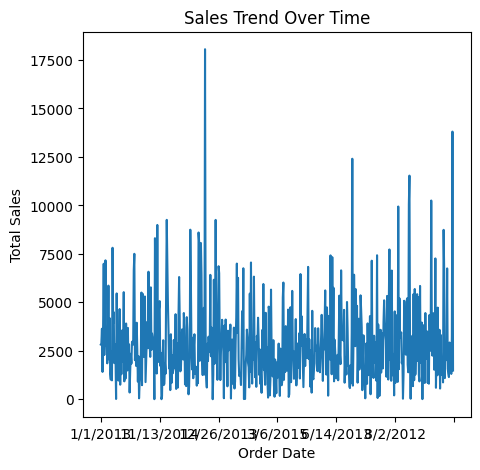

In [42]:
# Exploratory Data Analysis
plt.figure(figsize=(5, 5))
data2.groupby('Order Date')['Sales'].sum().plot()
plt.title("Sales Trend Over Time")
plt.xlabel("Order Date")
plt.ylabel("Total Sales")
plt.show()

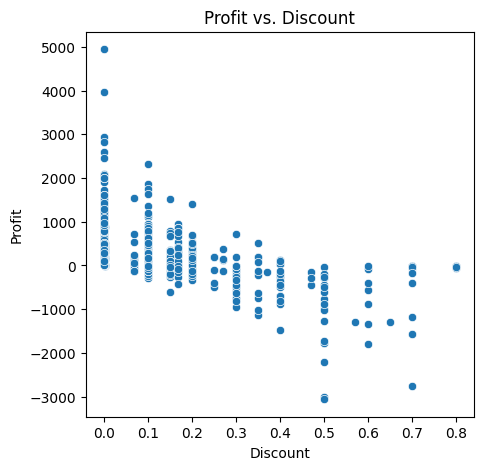

In [41]:
# Scatter Plot: Profit vs Discount
plt.figure(figsize=(5, 5))
sns.scatterplot(x=data2['Discount'], y=data2['Profit'])
plt.title("Profit vs. Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

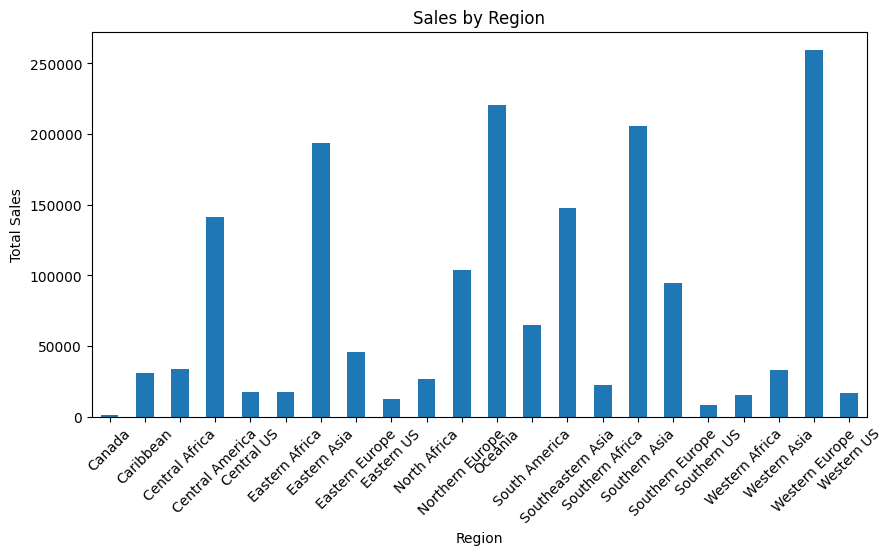

In [45]:
# Bar Plot: Sales by Region
plt.figure(figsize=(10, 5))
data2.groupby('Region')['Sales'].sum().plot(kind='bar')
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

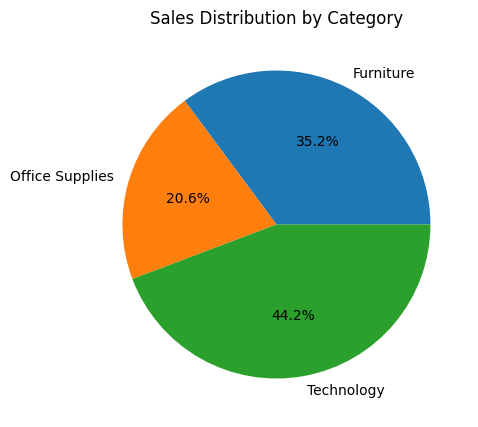

In [47]:
# Pie Chart: Sales by Category
plt.figure(figsize=(5, 5))
data2.groupby('Category')['Sales'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title("Sales Distribution by Category")
plt.ylabel("")
plt.show()

In [50]:
# Predictive Modeling
X = data2[['Profit', 'Discount']]
y = data2['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [51]:
# Model Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")

R² Score: 0.3931631968113388
Mean Squared Error: 768263.9714577636
